In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

In [26]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [29]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [30]:
#check duplicate value
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [31]:
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [33]:
df.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


# Feature Enginneering

In [34]:
categ = ['sex', 'smoker', 'region']

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [35]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [36]:
# bmi <= 18.5
underWt=df[df['bmi'] < 18.5]
count1=underWt.bmi.count()
percent1=count1*100/df.bmi.count()

# bmi <= 25 and bmi > 18.5
# sum(i > 18.5 and i<25  for i in df.bmi)
healthyWt = df[(df['bmi']<25) & (df['bmi']>= 18.5)]
count2=healthyWt.bmi.count()
percent2=count2*100/df.bmi.count()

# bmi <= 30 and bmi > 25
overWt= df[(df['bmi']<30) & (df['bmi']>= 25)]
count3=overWt.bmi.count()
percent3=count3*100/df.bmi.count()

# bmi > 30
obese= df[(df['bmi']< 40) & (df['bmi'] >= 30)]
count4=obese.bmi.count()
percent4=count4*100/df.bmi.count()

# bmi > 40
severeObese = df[df['bmi'] >= 40]
count5=severeObese.bmi.count()
percent5=count5*100/df.bmi.count()

In [37]:
df_bmi = pd.DataFrame({'Weight' : ['Under Weight', 'Healthy Weight', 'Over Weight', 'Obesity (class1 and class2)',
                                'Severe Obesity (class3)'],
                   'No. of patients' : [count1, count2, count3, count4,
                                 count5],
                   'percentage' : [percent1,percent2,percent3,percent4,percent5]})
df_bmi

,Weight,No. of patients,percentage
0,Under Weight,20,1.495886
1,Healthy Weight,225,16.828721
2,Over Weight,386,28.870606
3,Obesity (class1 and class2),615,45.998504
4,Severe Obesity (class3),91,6.806283


# Correlation and Visualization

#### Pearson correlation

<AxesSubplot:>

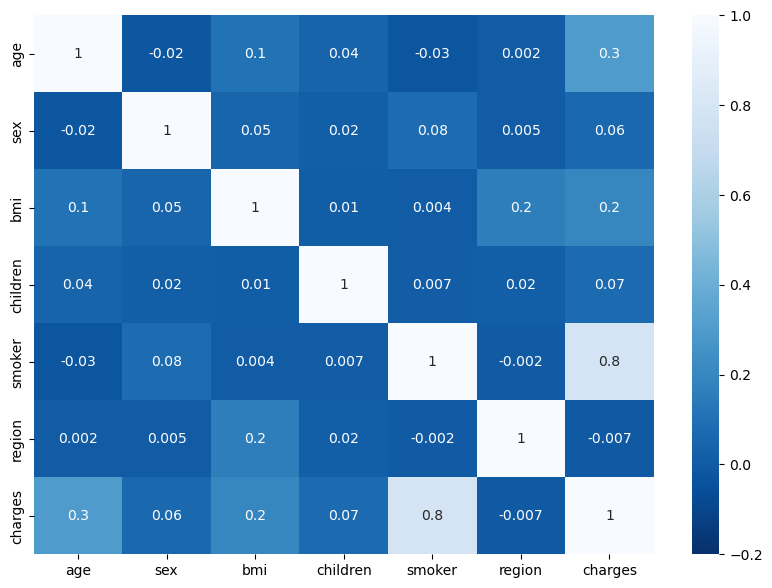

In [38]:
pearson = df.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data = pearson, vmin=-0.2, vmax=1, cmap= 'Blues_r',annot=True, fmt=".1g")

### Full data table visualization

##### Charges

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box distribution of charges')

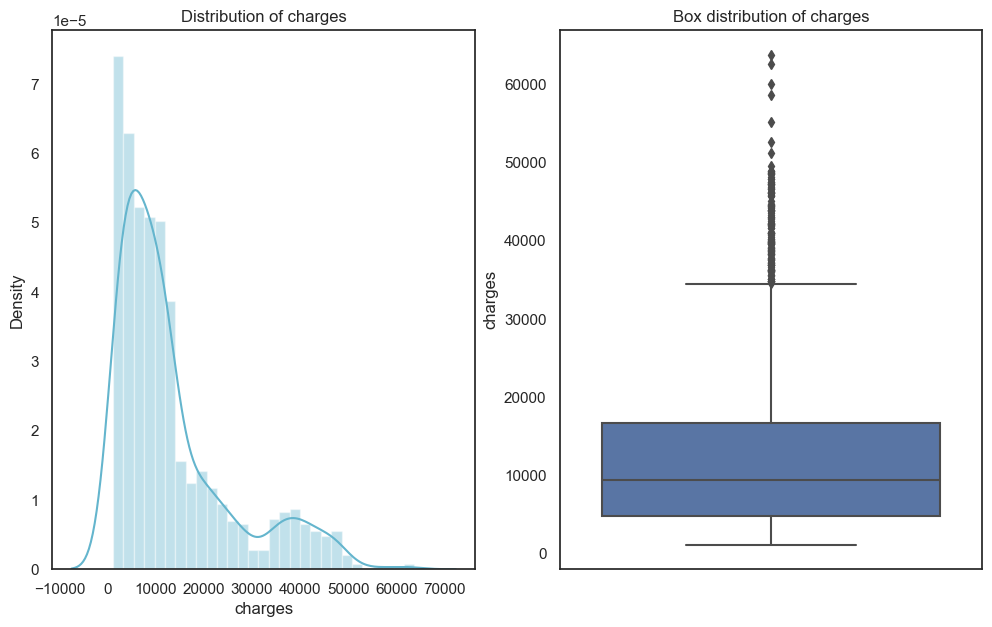

In [39]:
sns.set(style='white')
fig, ax = plt.subplots(1,2,figsize=(12,7))
sns.distplot(df['charges'],color='c', ax=ax[0])
ax[0].set_title('Distribution of charges')
sns.boxplot(y='charges', data=df, ax=ax[1])
ax[1].set_title('Box distribution of charges')

## Charges and Smoker

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


sky blue color represents smoker and violet color represents non-smokers


Text(0.5, 1.0, 'Box Distribution of charges for smokers and non-smokers')

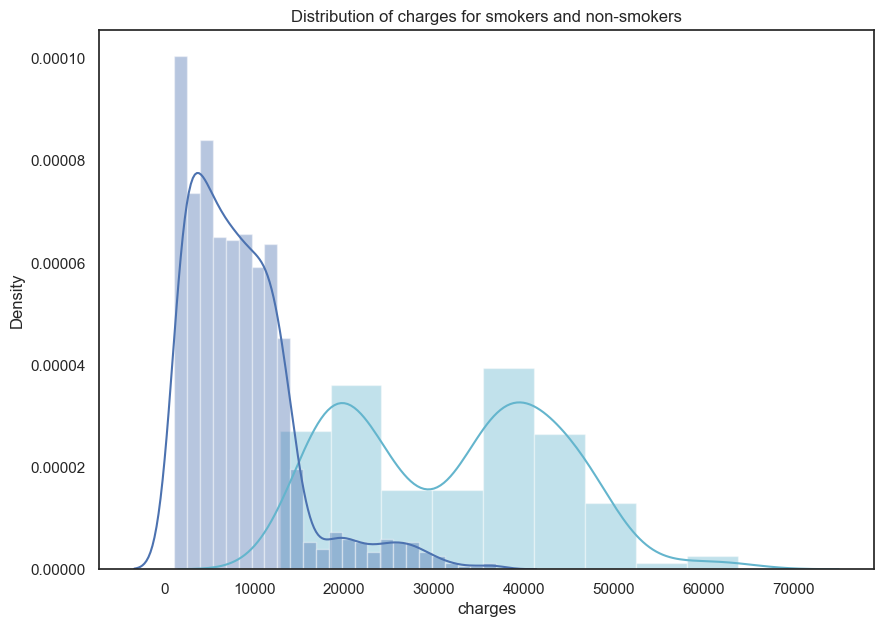

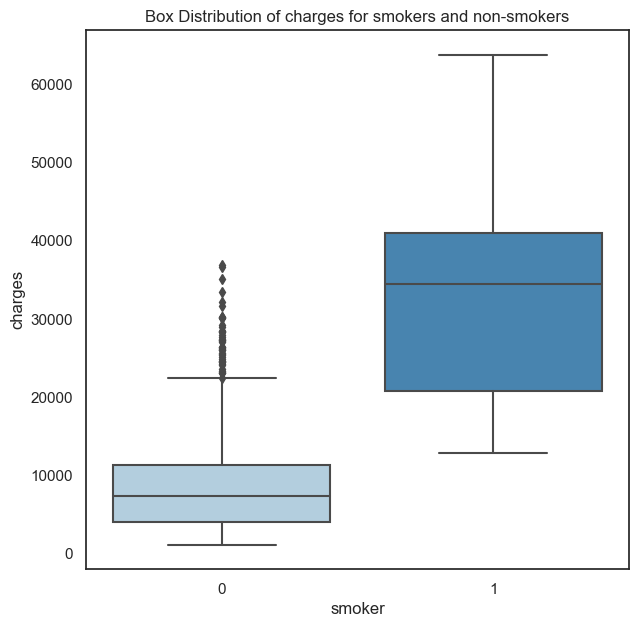

In [40]:
fig, ax= plt.subplots(figsize=(10,7))
ax.set_title('Distribution of charges for smokers and non-smokers')
sns.distplot(df[df.smoker == 1]['charges'], color = 'c')
sns.distplot(df[df.smoker == 0]['charges'], color = 'b')
print("sky blue color represents smoker and violet color represents non-smokers")
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(x="smoker", y="charges", data = df,palette = 'Blues')
ax.set_title('Box Distribution of charges for smokers and non-smokers')

Text(0.5, 1.0, 'Distribution of sex and smoker')

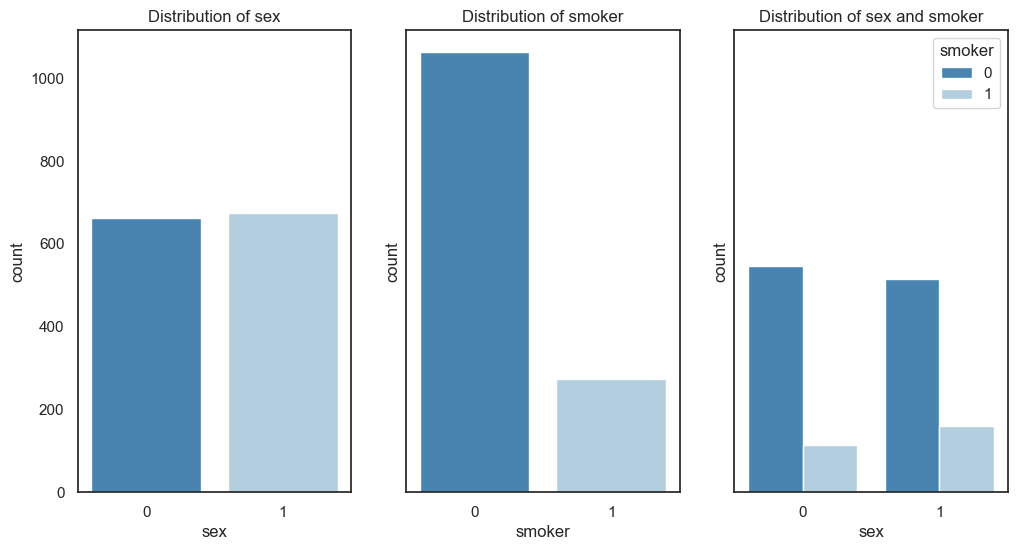

In [41]:
fig, ax=plt.subplots(1,3, sharey=True, figsize=(12,6))
sns.countplot(x="sex", palette="Blues_r", data=df, ax=ax[0])
ax[0].set_title('Distribution of sex')
sns.countplot(x="smoker", palette="Blues_r", data=df, ax=ax[1] )
ax[1].set_title('Distribution of smoker')
sns.countplot(x="sex", hue="smoker", palette="Blues_r", data=df, ax=ax[2])
ax[2].set_title('Distribution of sex and smoker')

## Age and Smoker data

<AxesSubplot:title={'center':'Distribution of age and smoker'}, xlabel='age', ylabel='count'>

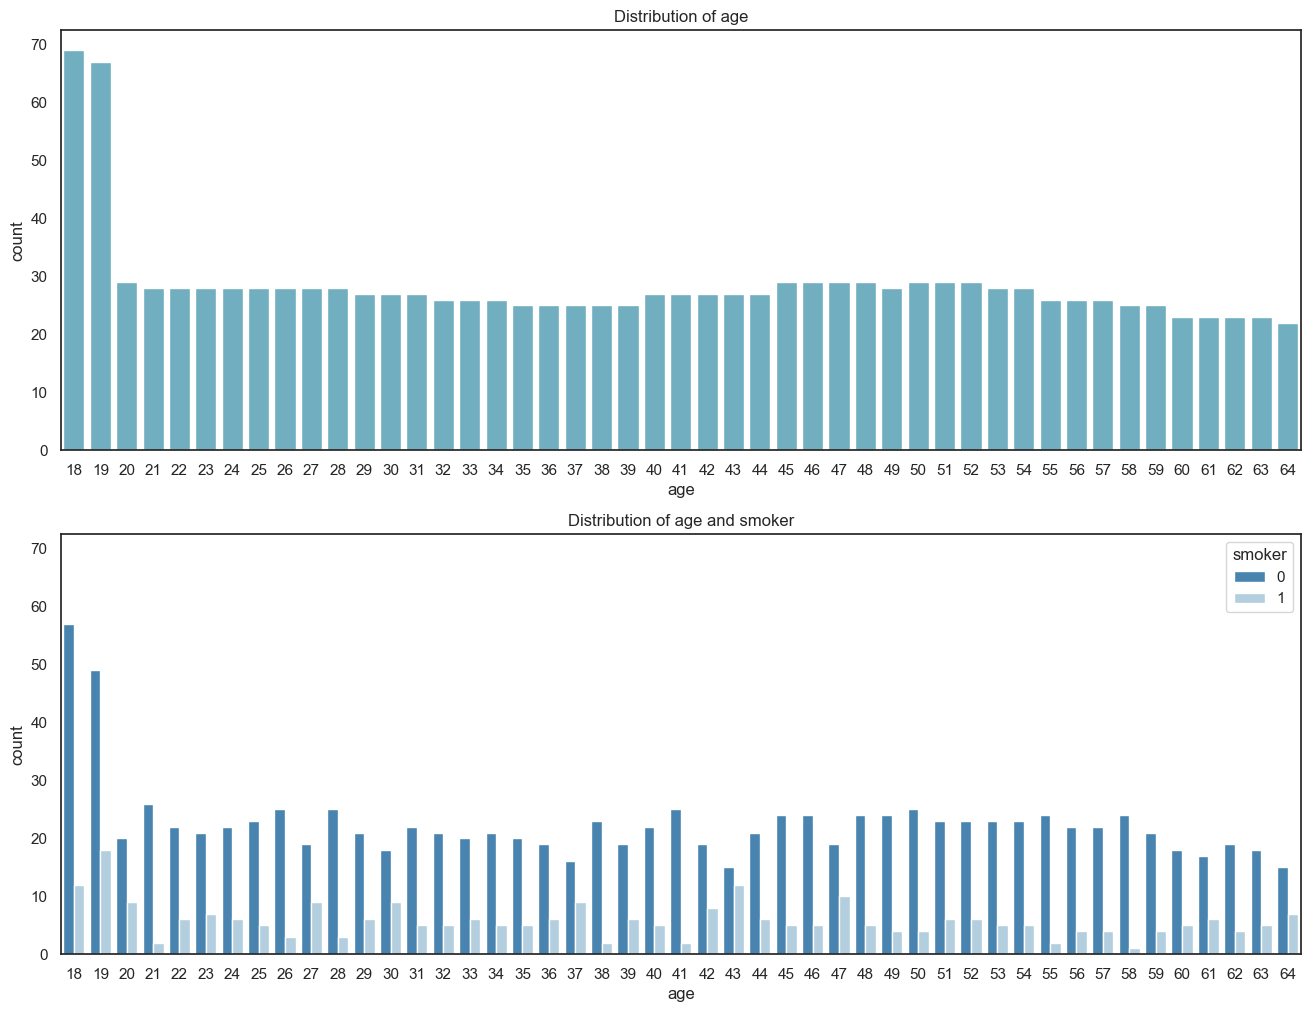

In [42]:
fig, ax=plt.subplots(2,1, sharey=True, figsize=(16,12))
ax[0].set_title('Distribution of age')
sns.countplot(x='age', data=df, color='c', ax=ax[0])
ax[1].set_title('Distribution of age and smoker')
sns.countplot(x='age',hue='smoker', data=df, palette='Blues_r',ax=ax[1])

## Age, smoker and charges data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.4% of the points

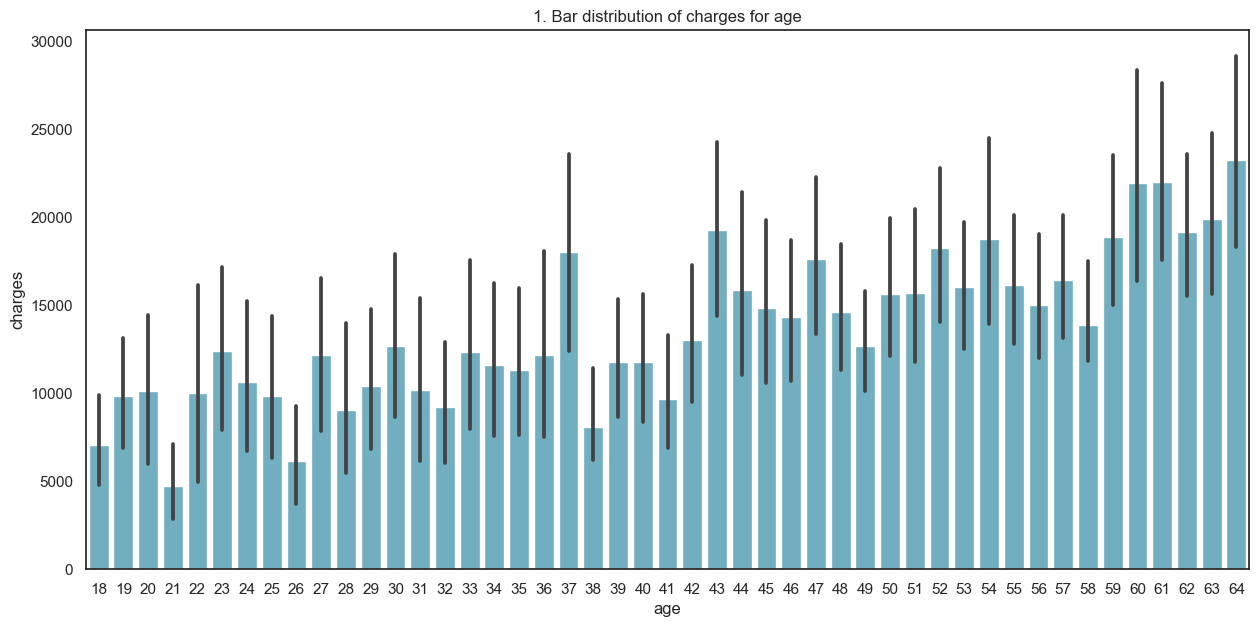

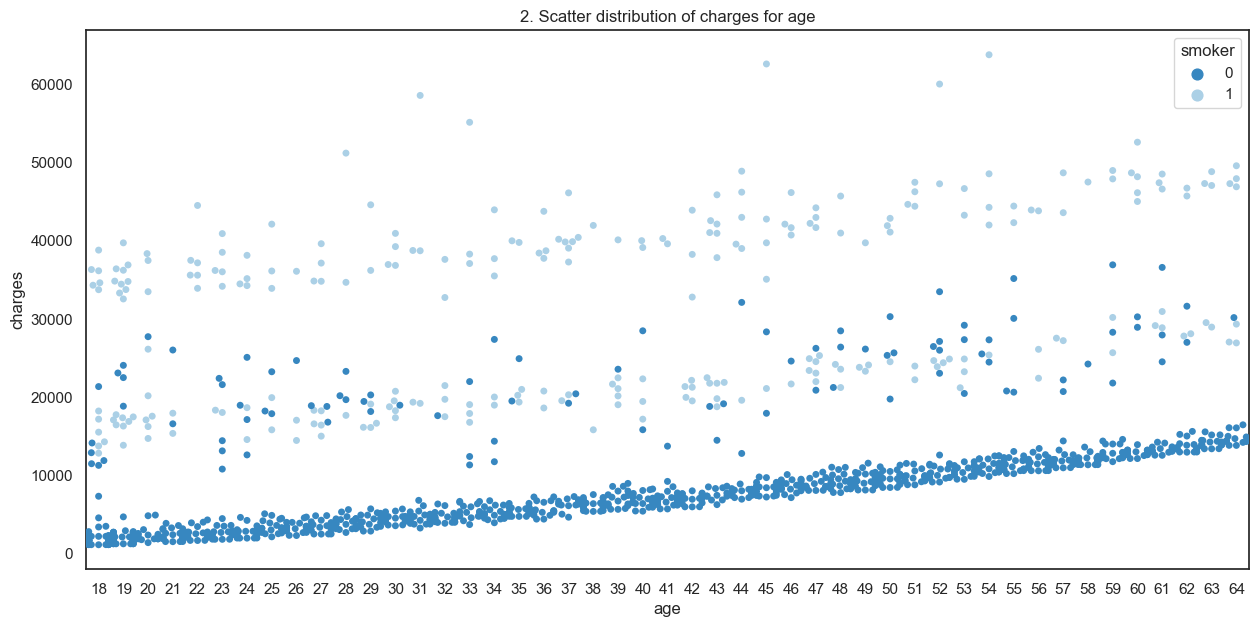

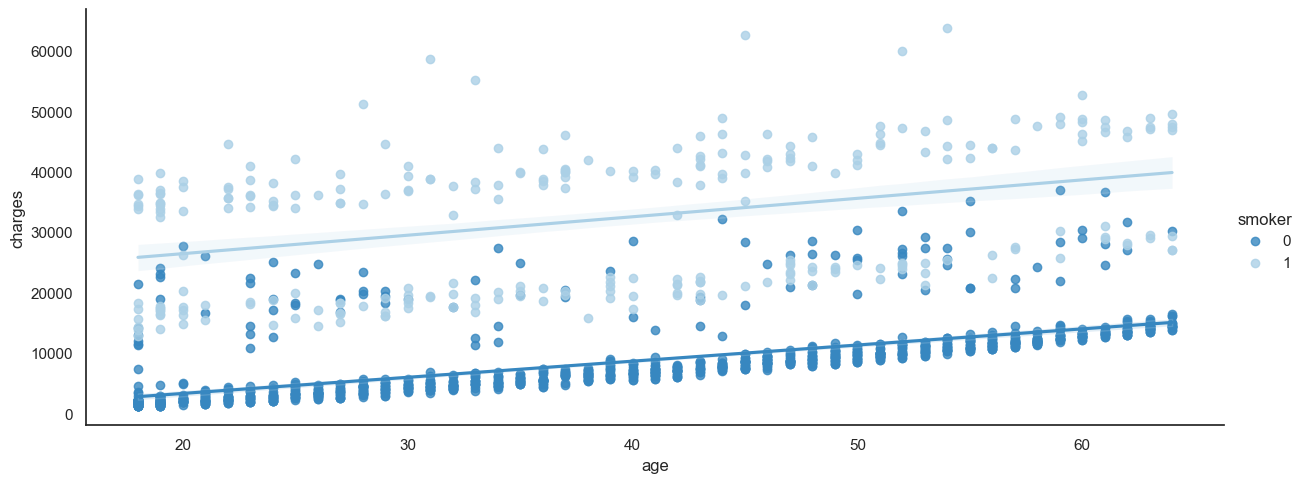

In [43]:
fig, ax=plt.subplots(figsize=(15, 7))
ax.set_title('1. Bar distribution of charges for age')
sns.barplot(x='age',y='charges',data=df, color='c', ax=ax)
fig, ax=plt.subplots(figsize=(15, 7))
ax.set_title('2. Scatter distribution of charges for age')
sns.swarmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=df, ax=ax)
sns.lmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=df, aspect=2.5);

## Smoker, Charges and Sex

<AxesSubplot:title={'center':'Box Distribution of charges for smoker and sex'}, xlabel='smoker', ylabel='charges'>

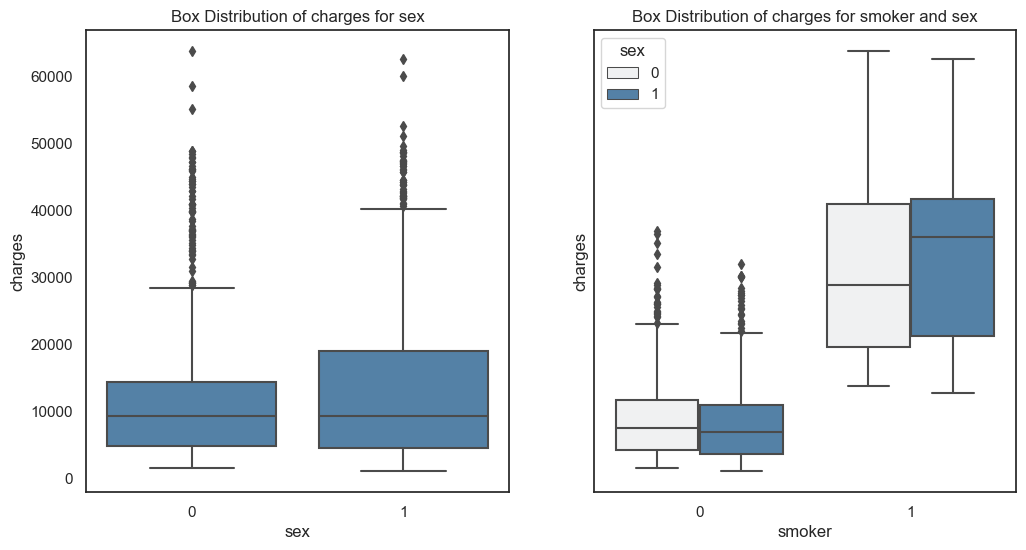

In [44]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6))
ax[0].set_title('Box Distribution of charges for sex')
sns.boxplot(x='sex', y='charges', data=df, color='steelblue', ax=ax[0])
ax[1].set_title('Box Distribution of charges for smoker and sex')
sns.boxplot(x='smoker', y='charges', hue='sex', data=df, color='steelblue', ax=ax[1])

## Region, Charge, Smoker and Sex

<AxesSubplot:xlabel='region', ylabel='count'>

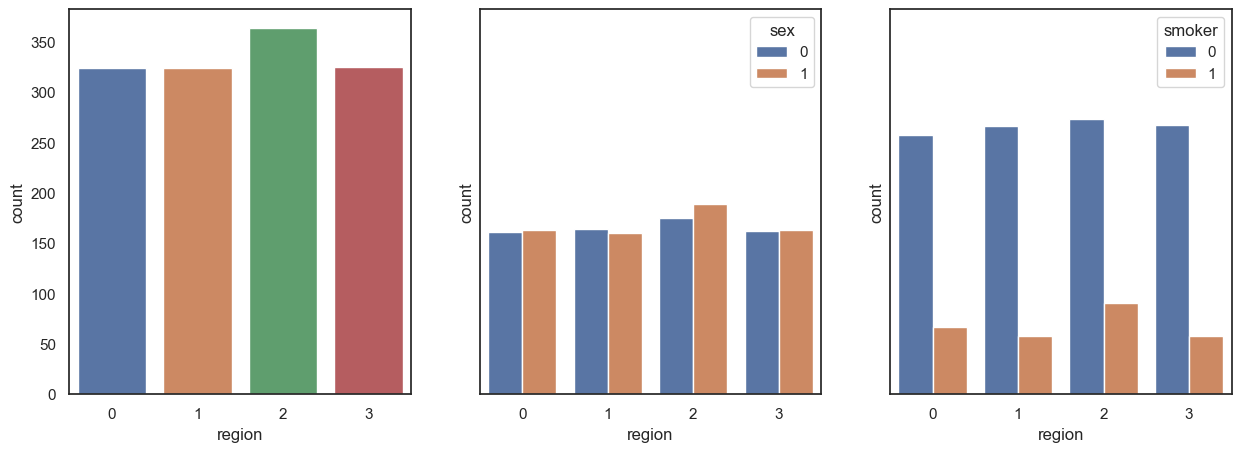

In [45]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(15,5))
sns.countplot(x='region', data=df, ax=ax[0])
sns.countplot(x='region',hue='sex', data=df, ax=ax[1])
sns.countplot(x='region',hue='smoker', data=df, ax=ax[2])

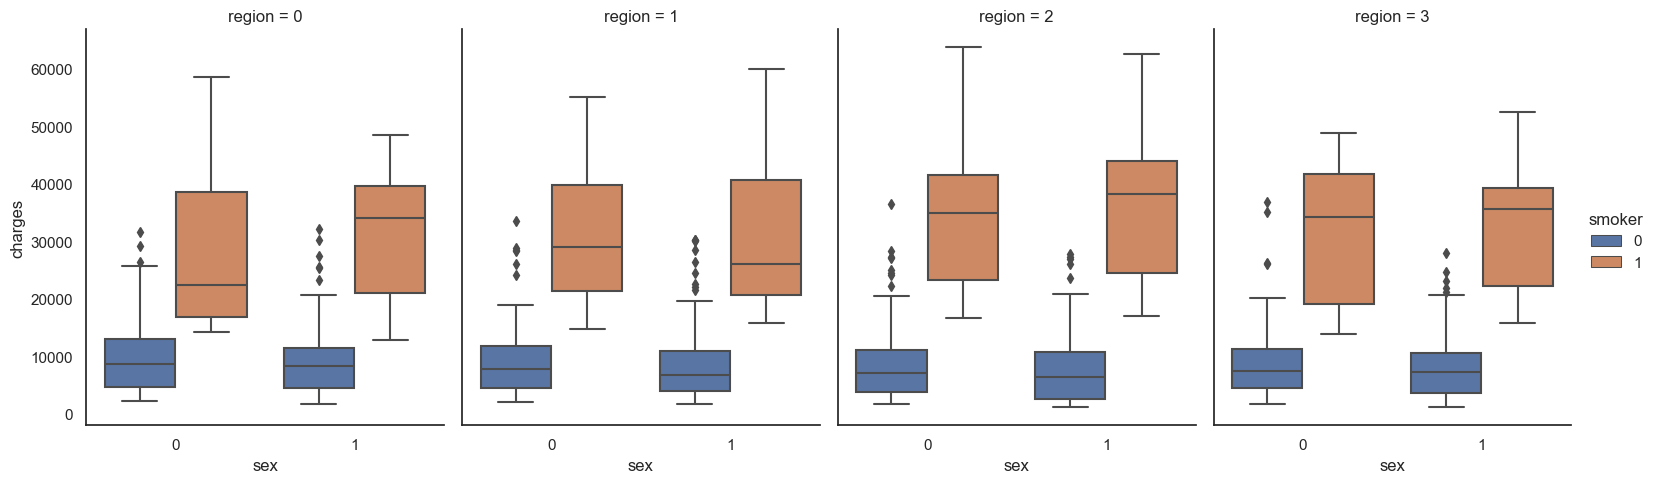

In [46]:
sns.catplot(x='sex',y='charges',hue='smoker',col='region',col_wrap=4, kind='box', data=df, aspect=0.8)

# Children, charges and Sex

<AxesSubplot:title={'center':'Distribution of charges for children and sex'}, xlabel='children', ylabel='charges'>

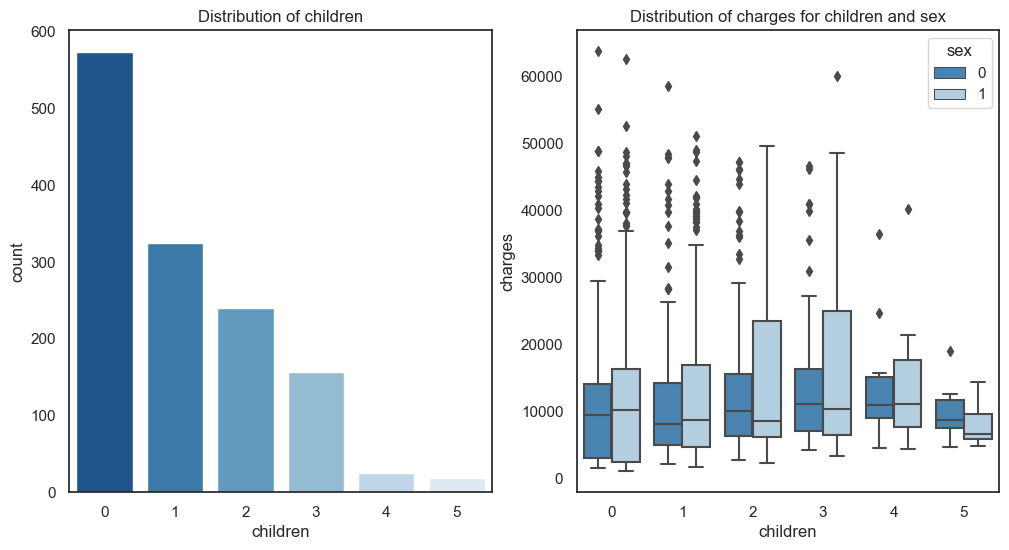

In [47]:
fig, ax = plt.subplots(1,2, sharex=True,figsize=(12,6))
ax[0].set_title('Distribution of children')
sns.countplot(x='children', palette='Blues_r', data=df, ax=ax[0])
ax[1].set_title('Distribution of charges for children and sex')
sns.boxplot(x='children',y='charges',hue='sex',palette='Blues_r', data=df, ax=ax[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

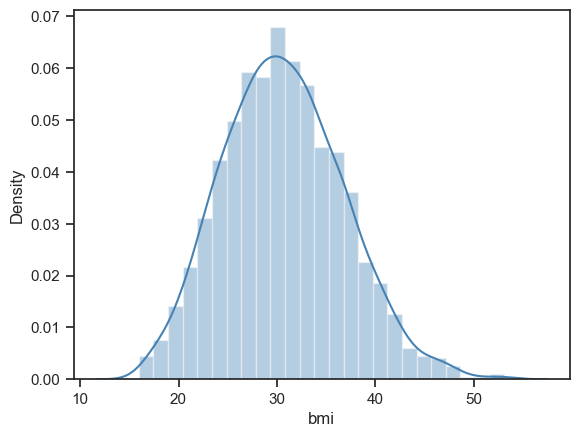

In [48]:
# white, dark, whitegrid, darkgrid, ticks
sns.set(style='ticks',)
sns.distplot(df.bmi, color='steelblue')

Scatter distribution of charges for bmi


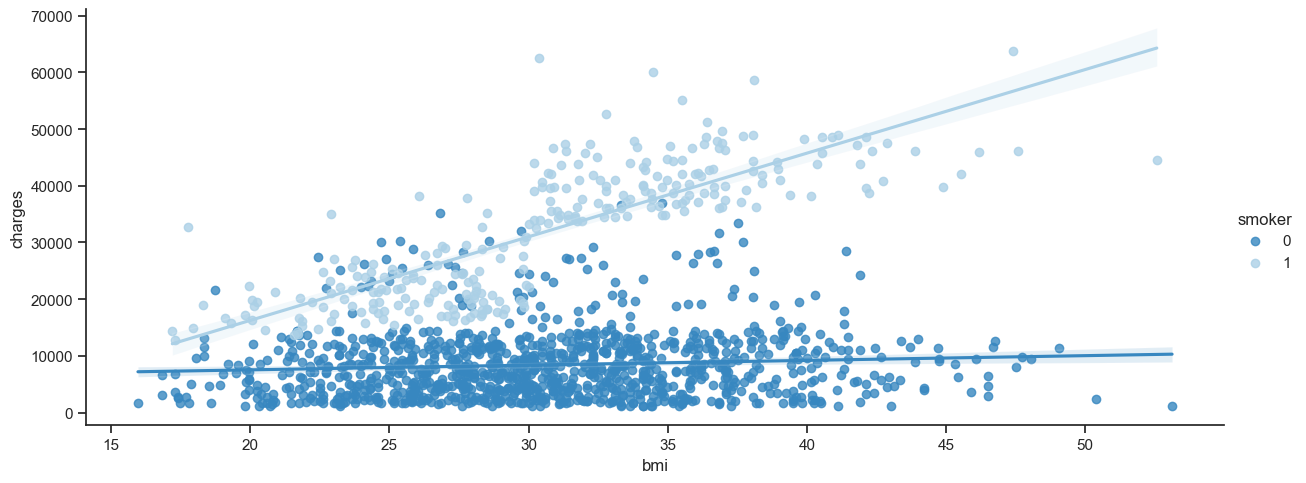

In [49]:
print('Scatter distribution of charges for bmi')
sns.lmplot(x='bmi', y='charges',hue='smoker',palette='Blues_r', data=df, aspect=2.5)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

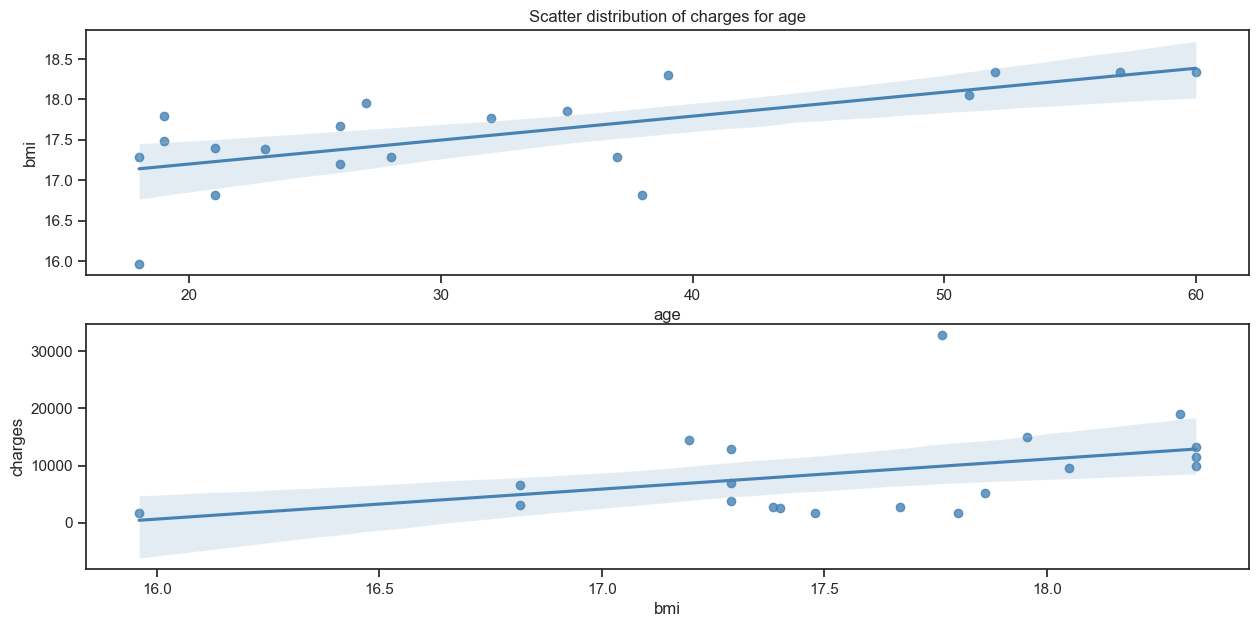

In [50]:
figg, ax=plt.subplots(2,1,figsize=(15, 7))
ax[0].set_title('Scatter distribution of charges for age')
sns.regplot(x='age', y='bmi', color='steelblue', data=underWt, ax=ax[0])
sns.regplot(x='bmi', y='charges', color='steelblue', data=underWt, ax=ax[1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


steel blue color represents male and sky blue color represents female


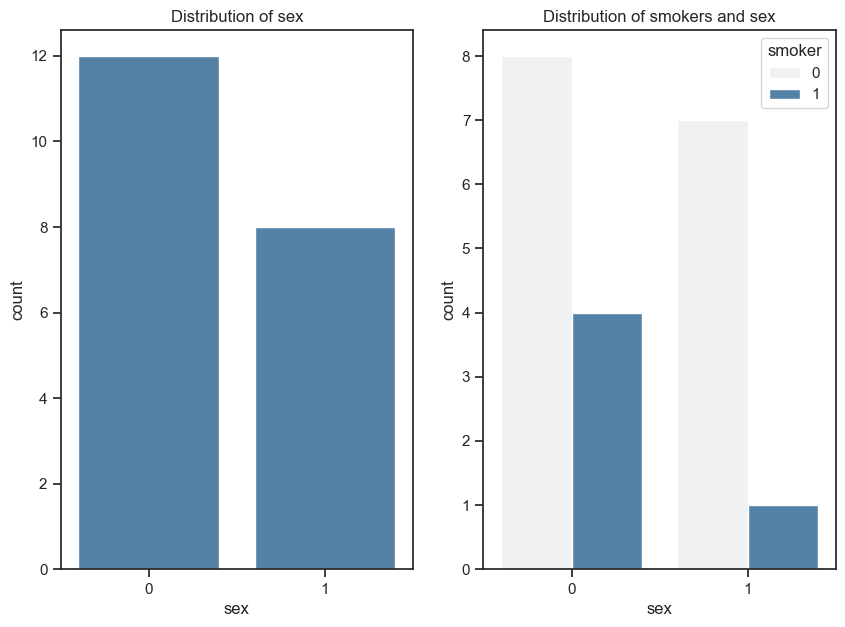

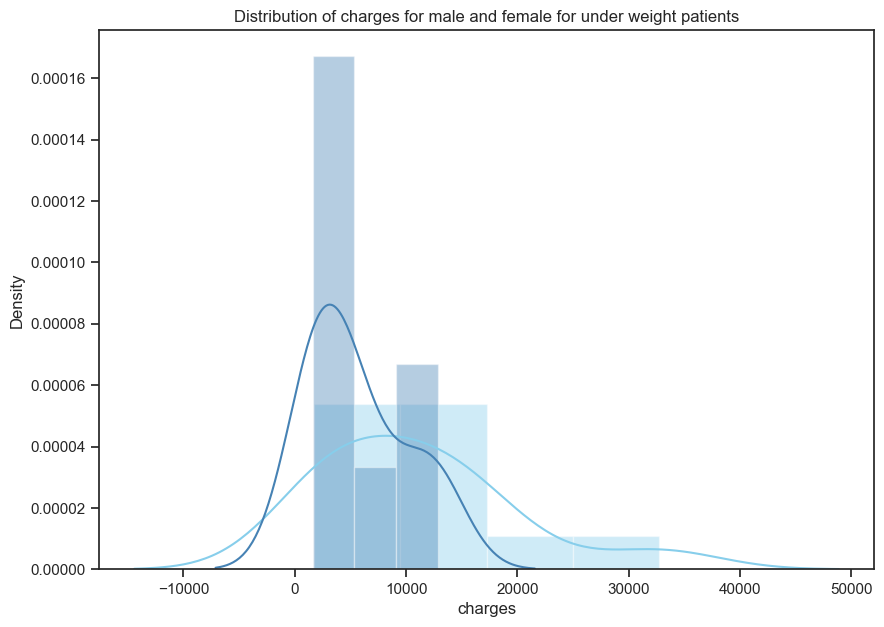

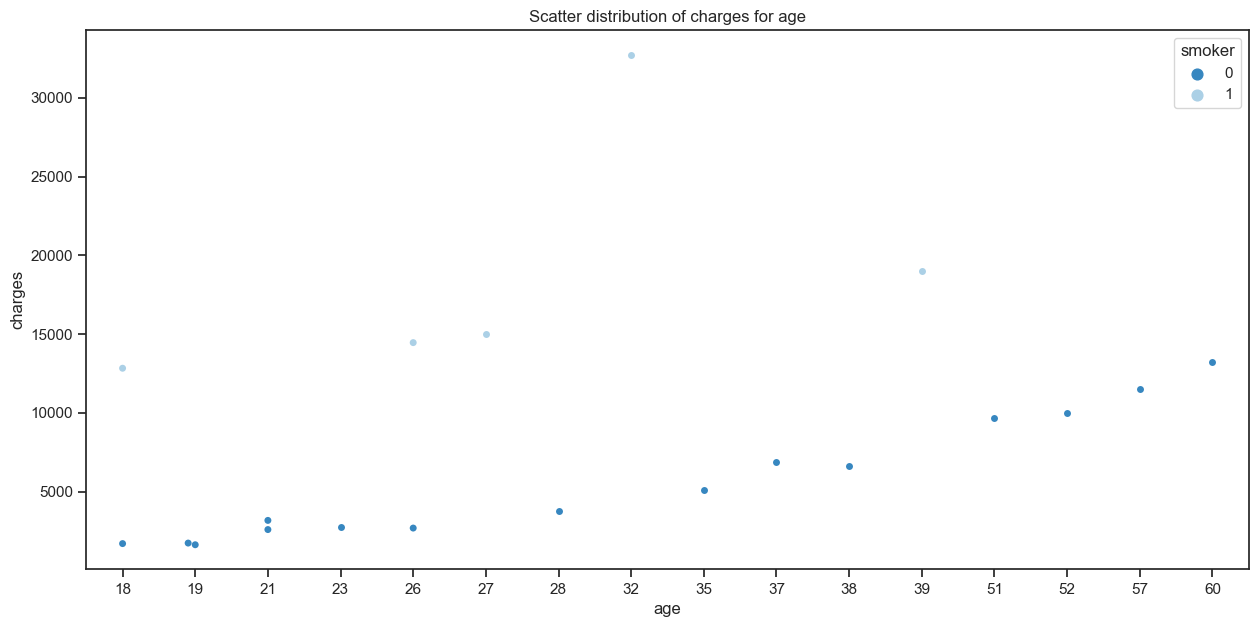

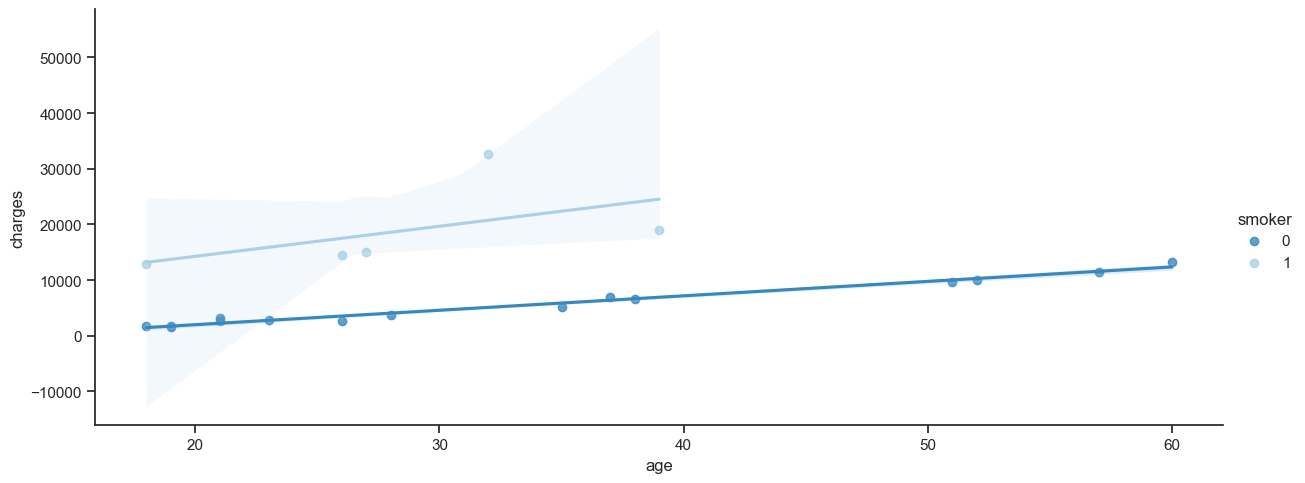

In [51]:
fig, ax= plt.subplots(1,2,figsize=(10,7))
ax[0].set_title('Distribution of sex')
ax[1].set_title('Distribution of smokers and sex')
sns.countplot(x="sex",color="steelblue", data=underWt, ax=ax[0])
sns.countplot(x="sex", hue='smoker', color="steelblue", data=underWt, ax=ax[1])

fig, ax= plt.subplots(figsize=(10,7))
ax.set_title('Distribution of charges for male and female for under weight patients')
sns.distplot(underWt[underWt.sex == 0]['charges'], color = 'skyblue')
sns.distplot(underWt[underWt.sex == 1]['charges'], color = 'steelblue')
print("steel blue color represents male and sky blue color represents female")

fig, ax=plt.subplots(figsize=(15, 7))
ax.set_title('Scatter distribution of charges for age')
sns.swarmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=underWt, ax=ax)
sns.lmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=underWt, aspect=2.5)

<AxesSubplot:title={'center':'Distribution of charges for children for under weight'}, xlabel='children', ylabel='charges'>

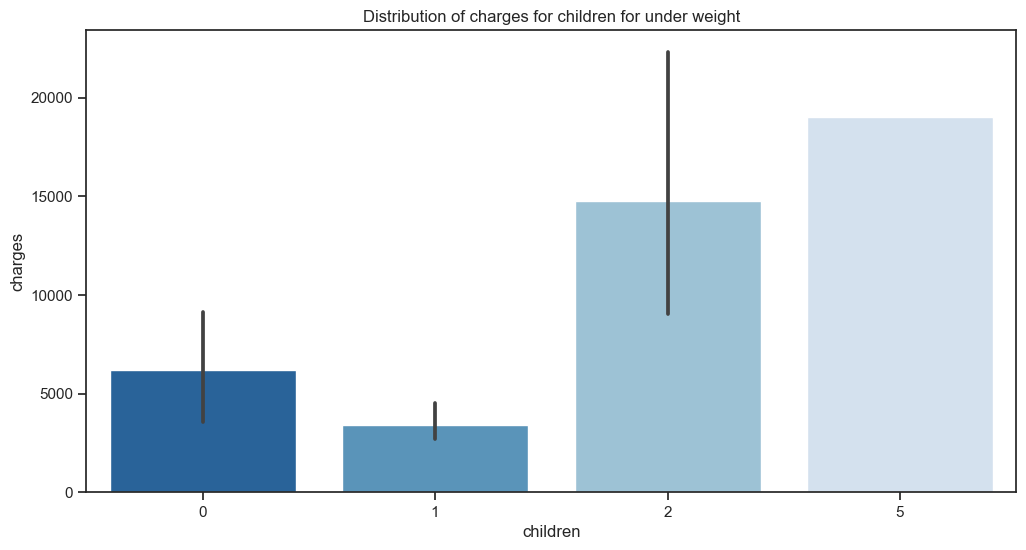

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Distribution of charges for children for under weight')
sns.barplot(x='children',y='charges',palette='Blues_r', data=underWt, ax=ax)

<AxesSubplot:>

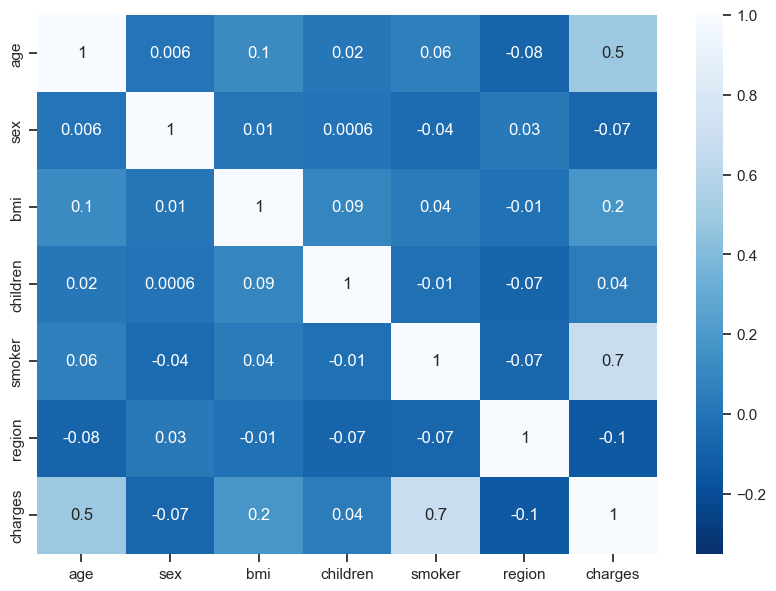

In [53]:
healthyCorr=healthyWt.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data = healthyCorr, vmin=-0.35, vmax=1, cmap= 'Blues_r',annot=True, fmt=".1g")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


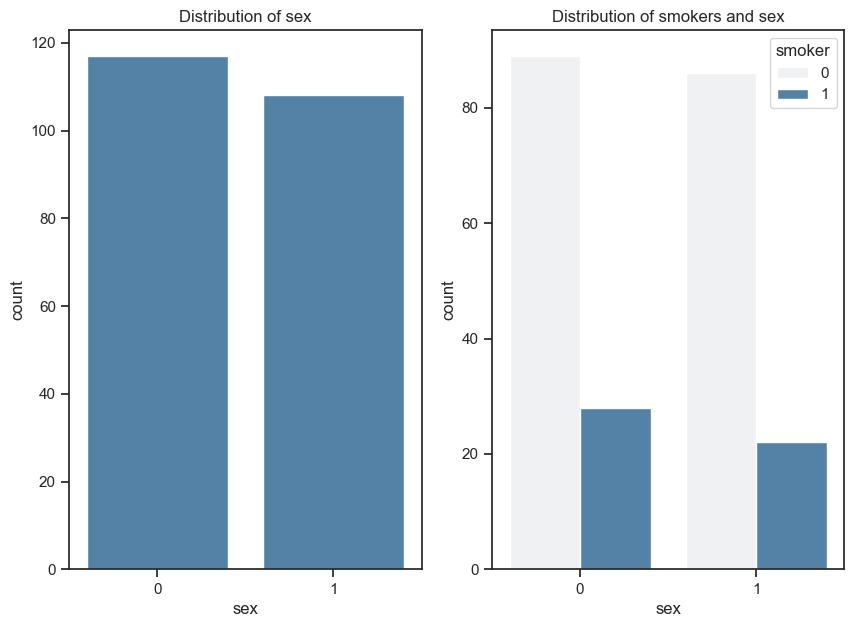

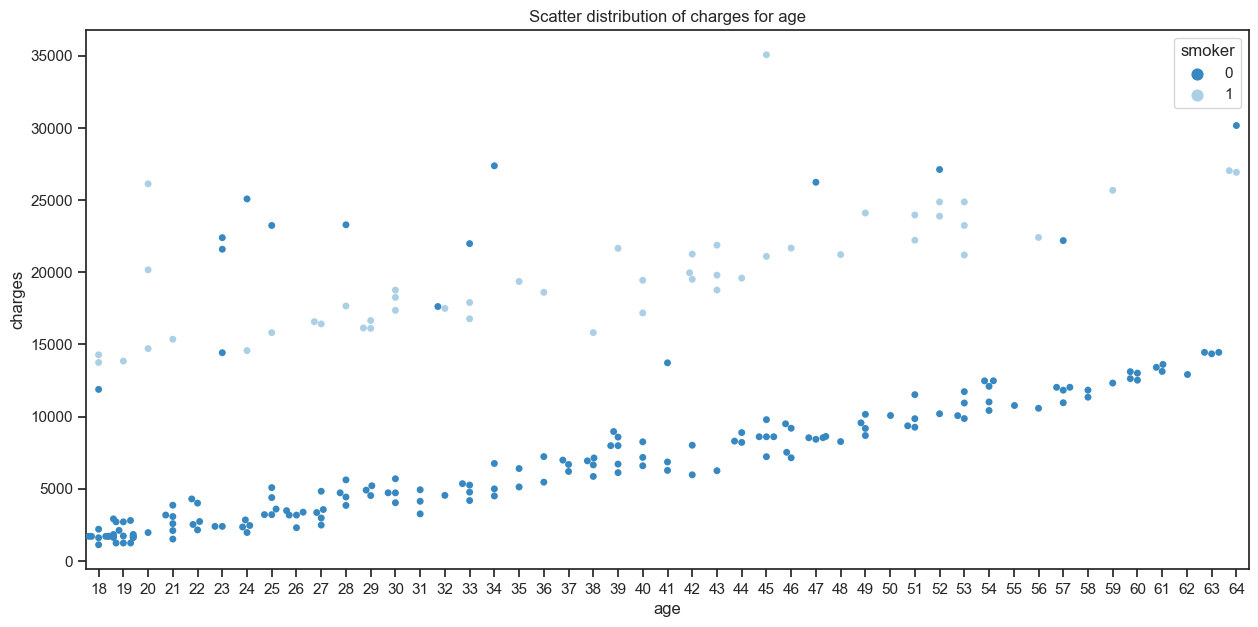

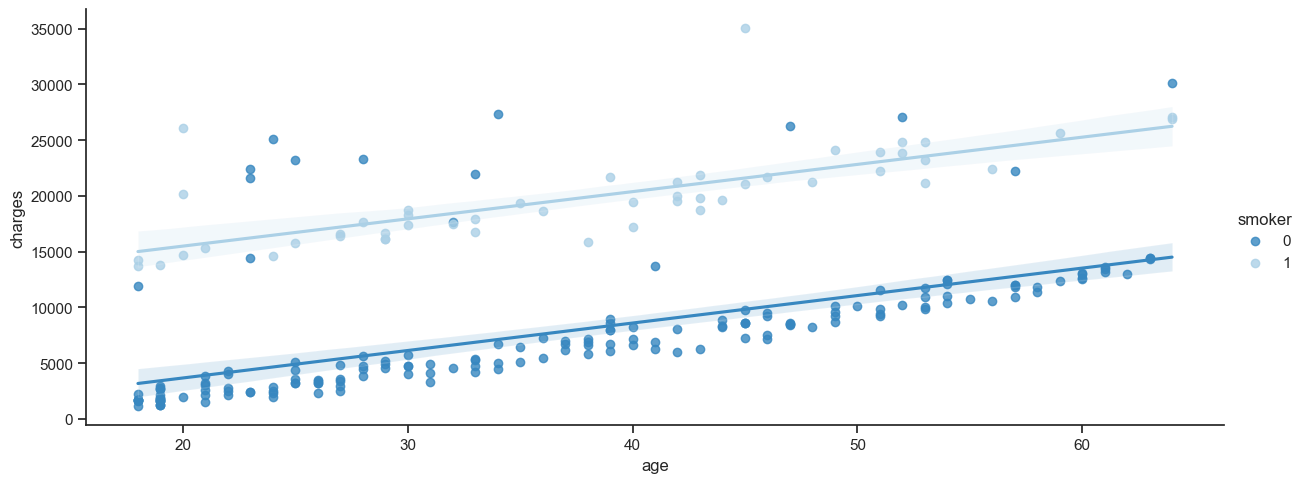

In [54]:
fig, ax= plt.subplots(1,2,figsize=(10,7))
ax[0].set_title('Distribution of sex')
ax[1].set_title('Distribution of smokers and sex')
sns.countplot(x="sex",color="steelblue", data=healthyWt, ax=ax[0])
sns.countplot(x="sex", hue='smoker', color="steelblue", data=healthyWt, ax=ax[1])

fig, ax=plt.subplots(figsize=(15, 7))
ax.set_title('Scatter distribution of charges for age')
sns.swarmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=healthyWt, ax=ax)
sns.lmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=healthyWt, aspect=2.5)

<AxesSubplot:>

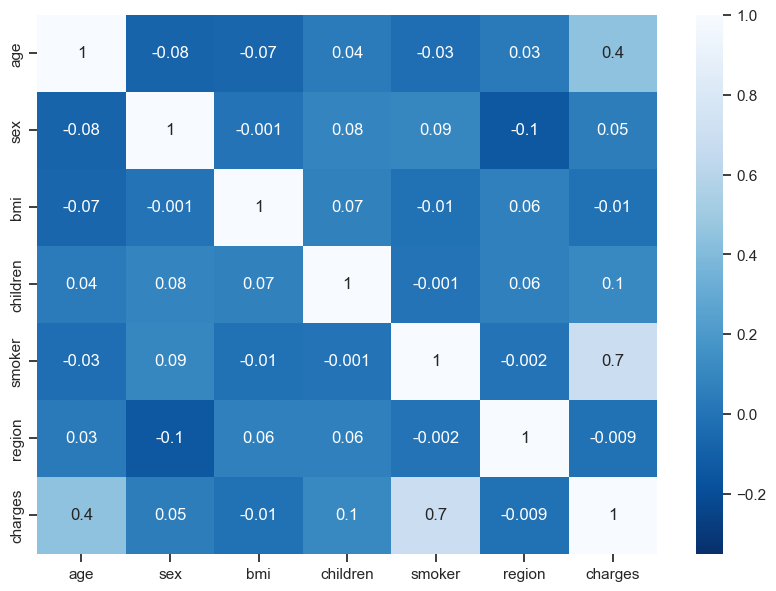

In [55]:
overCorr=overWt.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data = overCorr, vmin=-0.35, vmax=1, cmap= 'Blues_r',annot=True, fmt=".1g")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.9% of the points

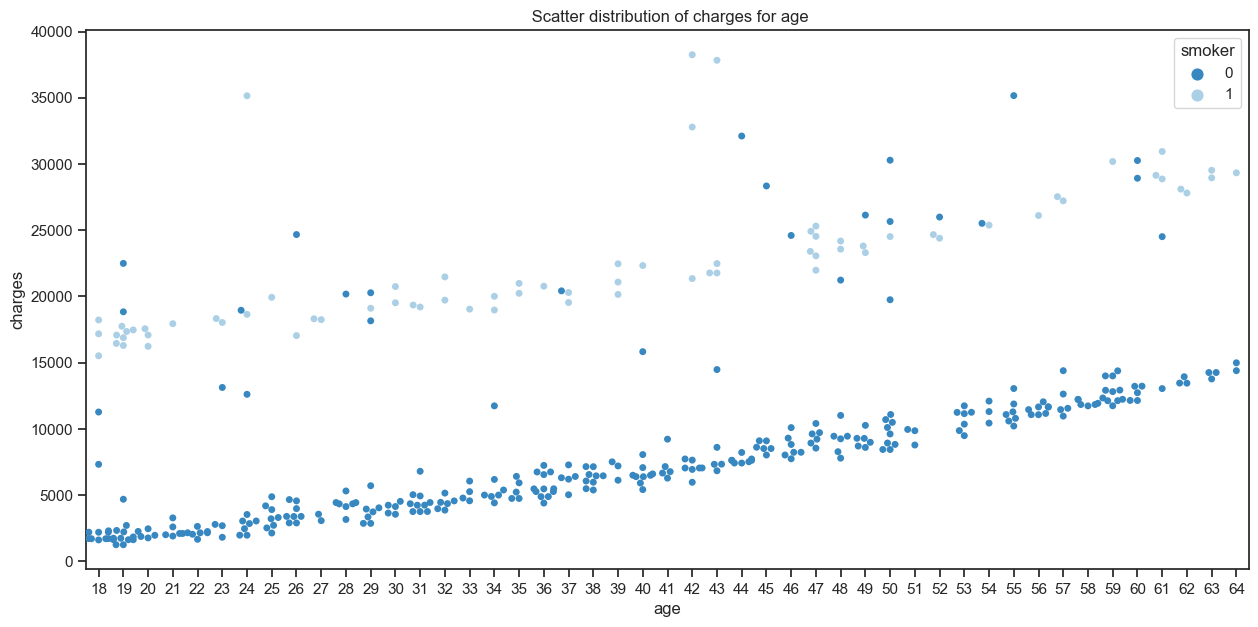

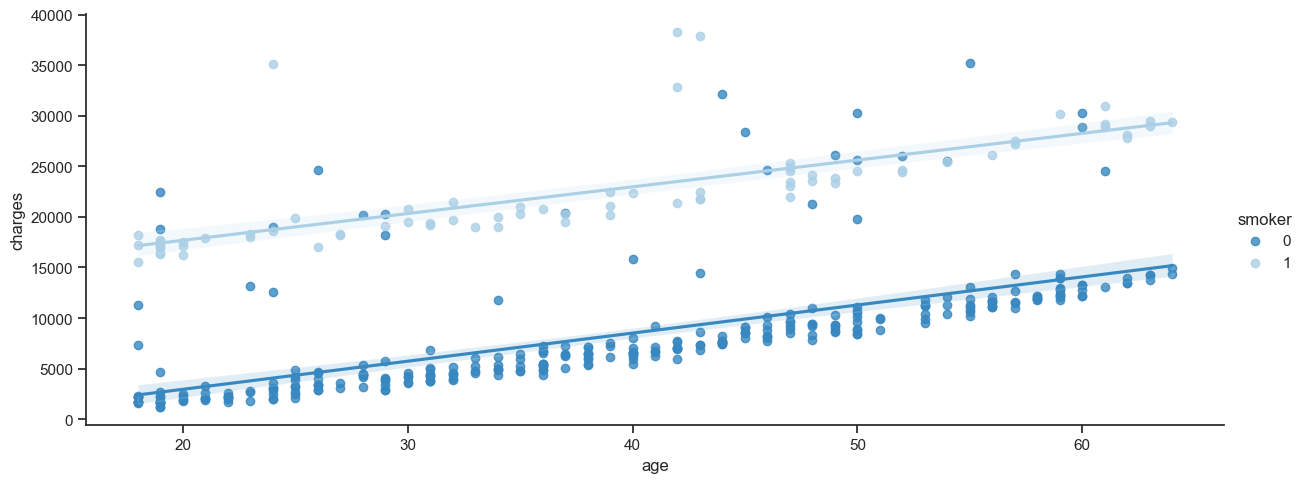

In [56]:
fig, ax=plt.subplots(figsize=(15, 7))
ax.set_title(' Scatter distribution of charges for age')
sns.swarmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=overWt, ax=ax)
sns.lmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=overWt, aspect=2.5)

<AxesSubplot:>

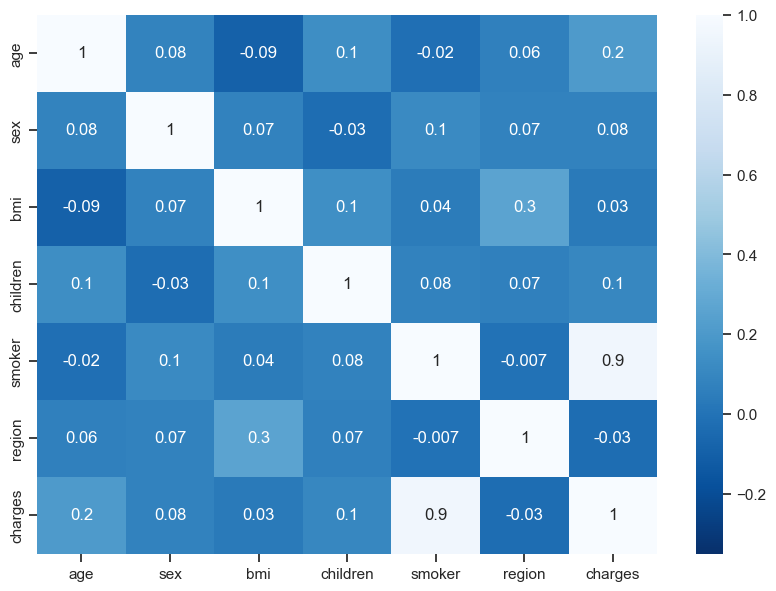

In [57]:
severeObeseCorr=severeObese.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data = severeObeseCorr, vmin=-0.35, vmax=1, cmap= 'Blues_r',annot=True, fmt=".1g")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


steel blue color represents male and sky blue color represents female


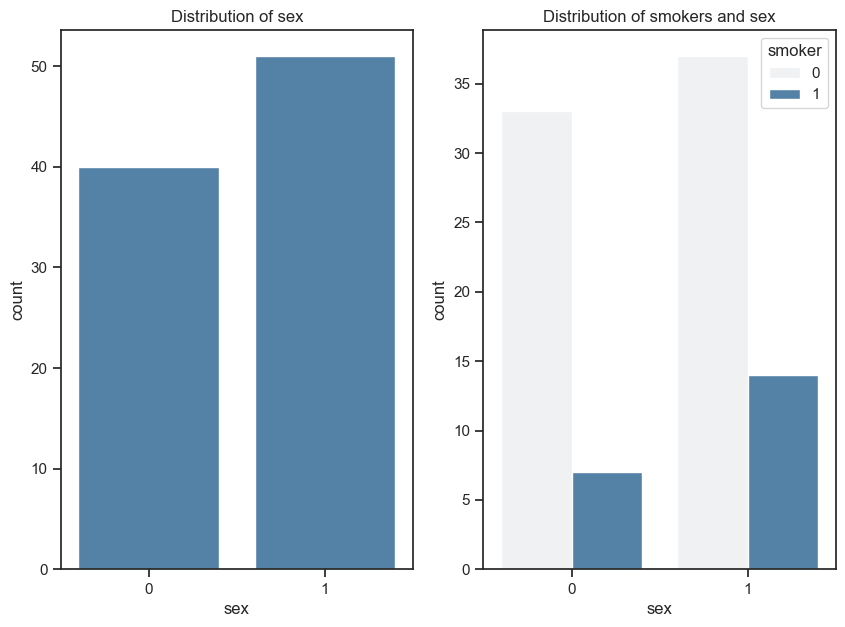

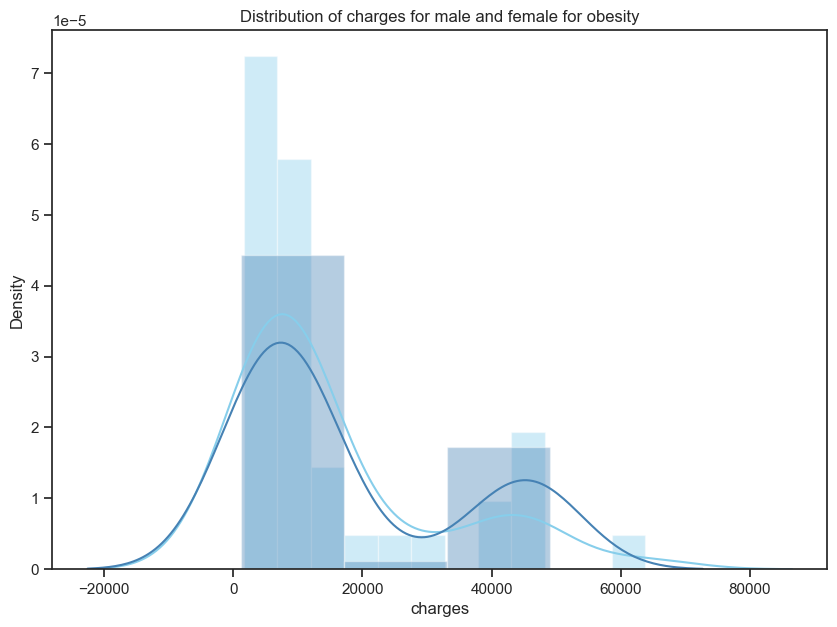

In [58]:
fig, ax= plt.subplots(1,2,figsize=(10,7))
ax[0].set_title('Distribution of sex')
ax[1].set_title('Distribution of smokers and sex')
sns.countplot(x="sex",color="steelblue", data=severeObese , ax=ax[0])
sns.countplot(x="sex", hue='smoker', color="steelblue", data=severeObese , ax=ax[1])

fig, ax= plt.subplots(figsize=(10,7))
ax.set_title('Distribution of charges for male and female for obesity')
sns.distplot(severeObese[severeObese.sex == 0]['charges'], color = 'skyblue')
sns.distplot(severeObese[severeObese.sex == 1]['charges'], color = 'steelblue')
print("steel blue color represents male and sky blue color represents female")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


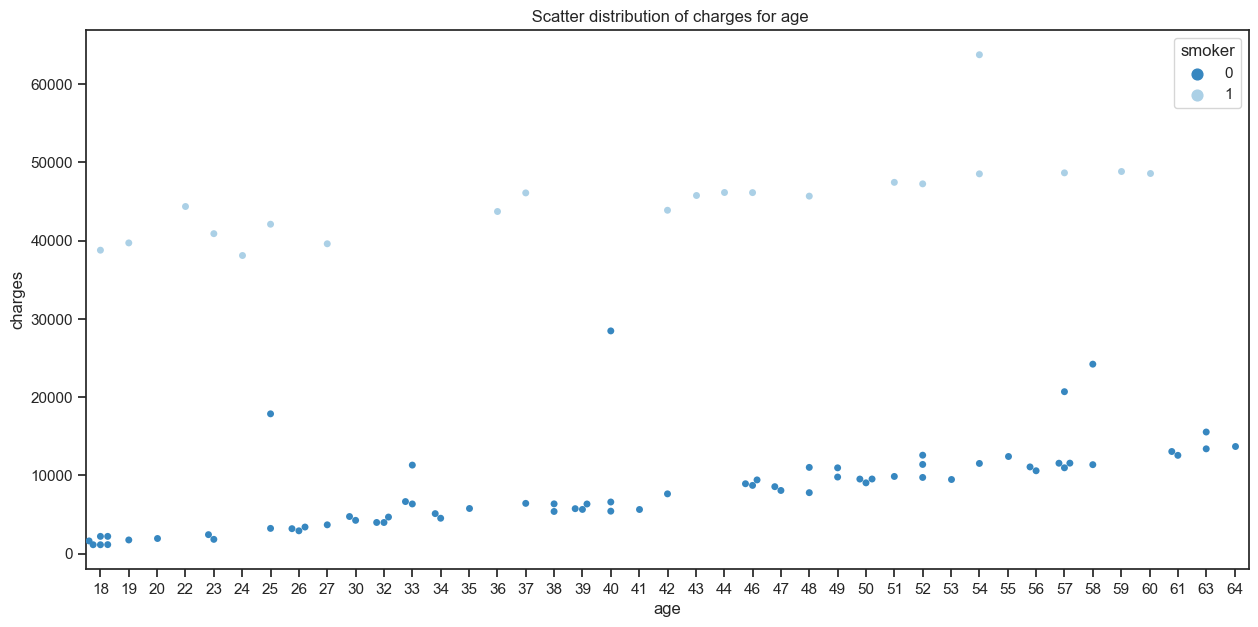

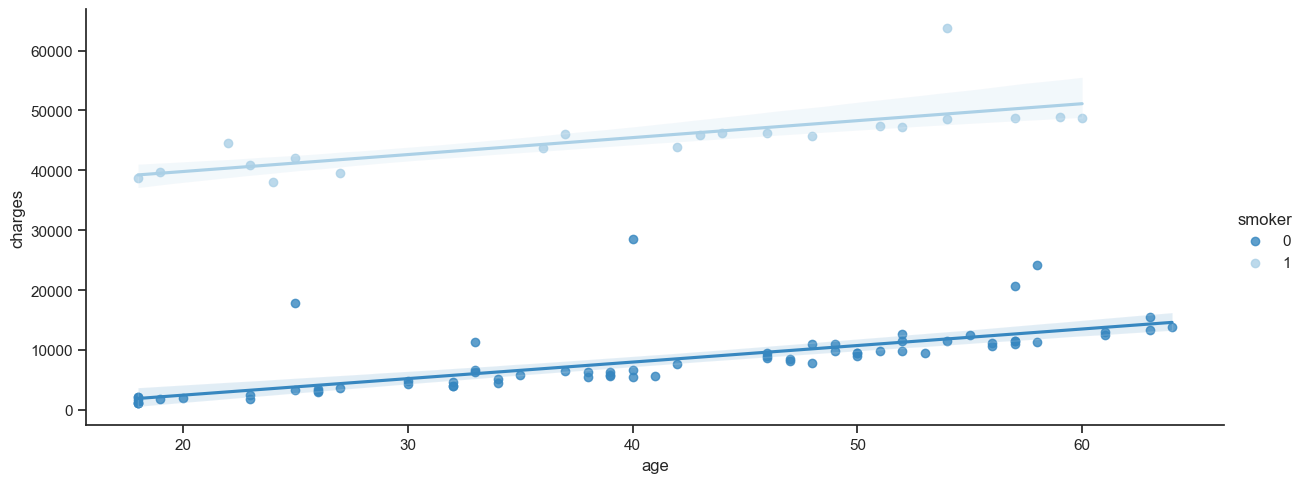

In [59]:
fig, ax=plt.subplots(figsize=(15, 7))
ax.set_title(' Scatter distribution of charges for age')
sns.swarmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=severeObese , ax=ax)
sns.lmplot(x='age', y='charges',hue='smoker',palette='Blues_r', data=severeObese , aspect=2.5)

In [60]:
age = df['age']
df_age = pd.DataFrame(age)

cut_labels = ['teenage', 'young adullt', 'mid-age adult', 'old']
cut_bins = [12, 18, 35, 55,float("inf")]

df_age['age_cat'] = pd.cut(df_age['age'], bins=cut_bins, labels=cut_labels)
df_age


,age,age_cat
0,19,young adullt
1,18,teenage
2,28,young adullt
3,33,young adullt
4,32,young adullt
...,...,...
1333,50,mid-age adult
1334,18,teenage
1335,18,teenage
1336,21,young adullt


In [61]:
bmi= df['bmi']
df_bmi1 = pd.DataFrame(bmi)

cut_labels = ['under', 'healthy', 'over', 'obesity ', 'severe obesity']
cut_bins = [0, 18.5, 25, 30, 40,float("inf") ]

df_bmi1['Weight'] = pd.cut(df_bmi1['bmi'], bins=cut_bins, labels=cut_labels)
df_bmi1

,bmi,Weight
0,27.900,over
1,33.770,obesity
2,33.000,obesity
3,22.705,healthy
4,28.880,over
...,...,...
1333,30.970,obesity
1334,31.920,obesity
1335,36.850,obesity
1336,25.800,over


In [62]:
def one_hot(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    df=pd.DataFrame(df)
    for feature in columnsToEncode:
        try:
            oneHot= pd.get_dummies(df[feature], prefix=feature)
            df = df.join(oneHot)
        except:
            print('Error encoding '+feature)
    return df.drop(columns=columnsToEncode)
df1_hot = one_hot(df)
df1_hot

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [63]:
df_age=one_hot(df_age).drop(columns='age')

In [64]:
df_bmi1=one_hot(df_bmi1).drop(columns='bmi')

In [65]:
new_df=df1_hot.join(df_age)
new_df=new_df.join(df_bmi1)
new_df

,age,sex,bmi,children,smoker,region,charges,age_cat_teenage,age_cat_young adullt,age_cat_mid-age adult,age_cat_old,Weight_under,Weight_healthy,Weight_over,Weight_obesity,Weight_severe obesity
0,19,0,27.900,0,1,3,16884.92400,0,1,0,0,0,0,1,0,0
1,18,1,33.770,1,0,2,1725.55230,1,0,0,0,0,0,0,1,0
2,28,1,33.000,3,0,2,4449.46200,0,1,0,0,0,0,0,1,0
3,33,1,22.705,0,0,1,21984.47061,0,1,0,0,0,1,0,0,0
4,32,1,28.880,0,0,1,3866.85520,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0,0,1,0,0,0,0,1,0
1334,18,0,31.920,0,0,0,2205.98080,1,0,0,0,0,0,0,1,0
1335,18,0,36.850,0,0,2,1629.83350,1,0,0,0,0,0,0,1,0
1336,21,0,25.800,0,0,3,2007.94500,0,1,0,0,0,0,1,0,0


<AxesSubplot:>

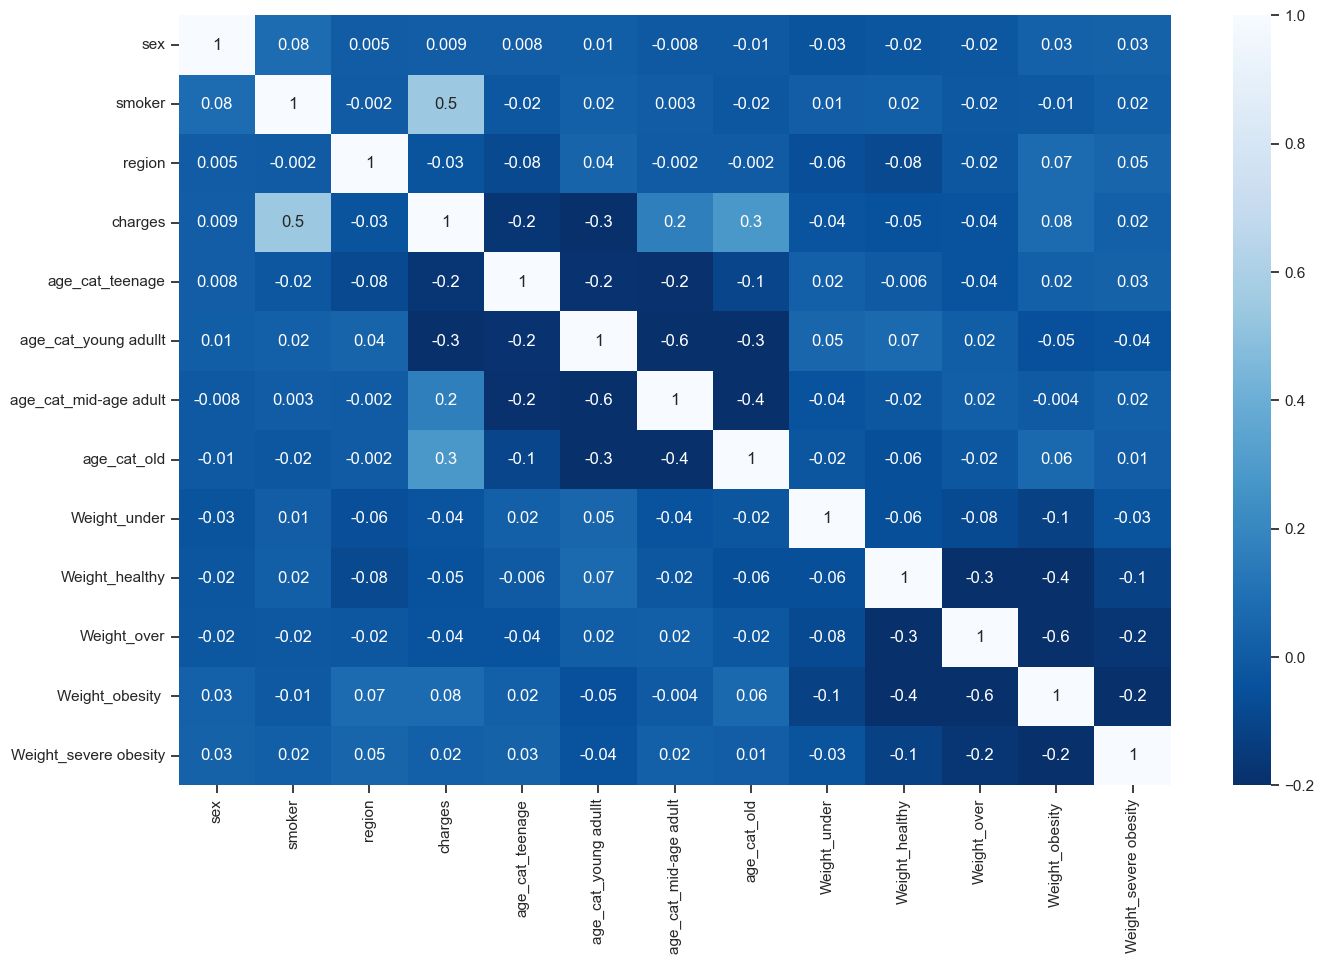

In [66]:
kendall= new_df.copy().drop(['age', 'bmi', 'children'], axis=1)
kendall=kendall.corr(method= 'kendall')
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(data = kendall, vmin=-0.2, vmax=1, cmap= 'Blues_r',annot=True, fmt=".1g")

## Machine learning algorithm


#### Linear regrassion

In [67]:
x = new_df.drop(['charges'], axis = 1)
y =  new_df.charges

In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lr = LinearRegression().fit(x_train,y_train)

In [69]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [70]:
y_test_pred

array([ 5110.62884127,  8238.94519197, 12294.80516166, 27424.90432376,
        7235.22553018,  1136.45297127,   877.92330101, -1007.81088292,
        1309.95752922, 15011.04862335, 10922.91181177, 26263.90803385,
       15705.15995285,  7971.37448808,  4098.07150523,  7379.08266463,
        4517.32659764,  7261.38157771,  4477.56384888, 16105.48021303,
        3610.82384163, 11361.7489759 ,  3238.71421943,  5536.06918304,
        5072.75823073,  9836.14018002,  2244.25240177, 13531.20087734,
        3850.92912147, 30580.5130734 ,  7520.31862504, 37067.36825182,
        8541.21362341, 13415.62550469, 25744.82873177, 16984.55541109,
       12399.18087834, 31223.21342705,  6888.1653639 ,  4262.28309322,
       28545.84803649,  3444.29025261,  4843.99842751, 39730.97919713,
       28418.58577479, 11997.98943263,  9850.55078636, 10503.72993698,
       13397.48029651,  6332.13254742, 33304.73179034,  4710.35465965,
       31513.55218362, 33893.41937039, 14159.73431846,  3291.57779139,
      

In [71]:
print('MAE train data: %.3f, MAE test data: %.3f' % (
mean_absolute_error(y_train,y_train_pred),
mean_absolute_error(y_test,y_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pred),
r2_score(y_test,y_test_pred)))

MAE train data: 4106.781, MAE test data: 4499.971
R2 train data: 0.756, R2 test data: 0.756


## Polynomial Regression

In [72]:
x = new_df.drop(['charges'], axis = 1)
y =  new_df.charges

In [73]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.fit_transform(x_test)
pol_reg = LinearRegression()
pol_reg.fit(x_train_poly, y_train)

LinearRegression()

In [75]:
y_test_pre=pol_reg.predict(poly_reg.fit_transform(x_test))
y_train_pre=pol_reg.predict(poly_reg.fit_transform(x_train))

In [76]:
print('MAE train data: %.3f, MAE test data: %.3f' % (
mean_absolute_error(y_train,y_train_pre),
mean_absolute_error(y_test,y_test_pre)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,y_train_pre),
r2_score(y_test,y_test_pre)))

MAE train data: 2710.836, MAE test data: 3272.541
R2 train data: 0.858, R2 test data: 0.832


#### Among Linear Ression and polynomial regression noticed that polynomial regression model is best